# **Details on DataSet**
This dataset contains information on all 800 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset includes ID, name, type, hit point, the base modifier for normal attacks, the base damage resistance against normal attacks, special attack, the base damage resistance against special attacks, determines which Pokemon attacks first each round, number of generation, and legendary Pokemon.



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pokemon/PokemonData.csv
/kaggle/input/pokemon/README.md
/kaggle/input/d/salmafirdausi/pokemon/Pokemon.csv


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Import Data

In [4]:
pokemon = pd.read_csv('/kaggle/input/d/salmafirdausi/pokemon/Pokemon.csv')

In [5]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [6]:
print("The number of sample in dataset is {}.".format(pokemon.shape[0]))

The number of sample in dataset is 800.


In [7]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# Check Data quality

In [8]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


We have one column with the name # which we need to drop

In [9]:
#Checking the type of categories in Type1
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Type 1 is a type that determines weakness/resistance to attacks. There are several categories in type 1 namely Grass, Fire, Water, Bug, Normal, Poison, Electric, Ground, Fairy, Fighting, Psychic, Rock, Ghost, Ice, Dragon, Dark, Steel, and Flying.

In [10]:
# checking the categories in type 2
pokemon['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Some Pokemon are dual type and have 2. There are several categories in type 1 namely Poison, Flying, Dragon, Ground, Fairy, Grass, Fightin, Psychic, Steel, Ice, Rock, Dark, Water, Electric, Fire, Ghost, Bug, and Normal.

In [11]:
# lets check how many nan value each column have
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

There are 386 null data in type 2.

[](http://)

In [12]:
print('Percentage of missing "Type 2" record is %.2f%%' %((pokemon['Type 2'].isnull().sum()/pokemon.shape[0])*100))

Percentage of missing "Type 2" record is 48.25%


Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64


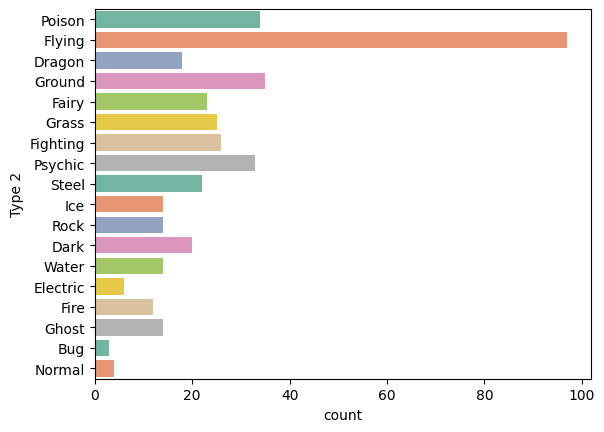

In [13]:
print(pokemon['Type 2'].value_counts())
sns.countplot(y='Type 2', data=pokemon, palette='Set2')
plt.show()

Since we have 48.25% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

In [14]:
pokemon.drop(columns='Type 2',inplace=True)

In [15]:
pokemon

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


Since we do not have use of null column so we will eliminate this column as well.

# Data Visulization

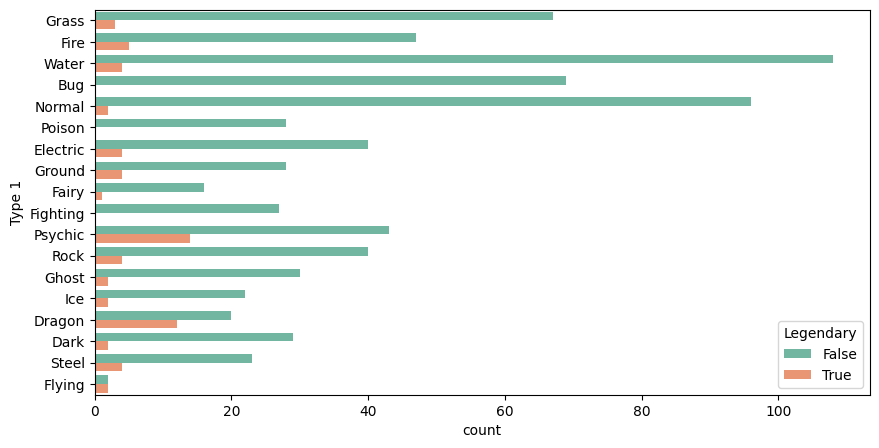

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=pokemon,y='Type 1',hue='Legendary',palette='Set2')
plt.title="type with legendary"

Psychic and Dragon type are more probable to be legendary.

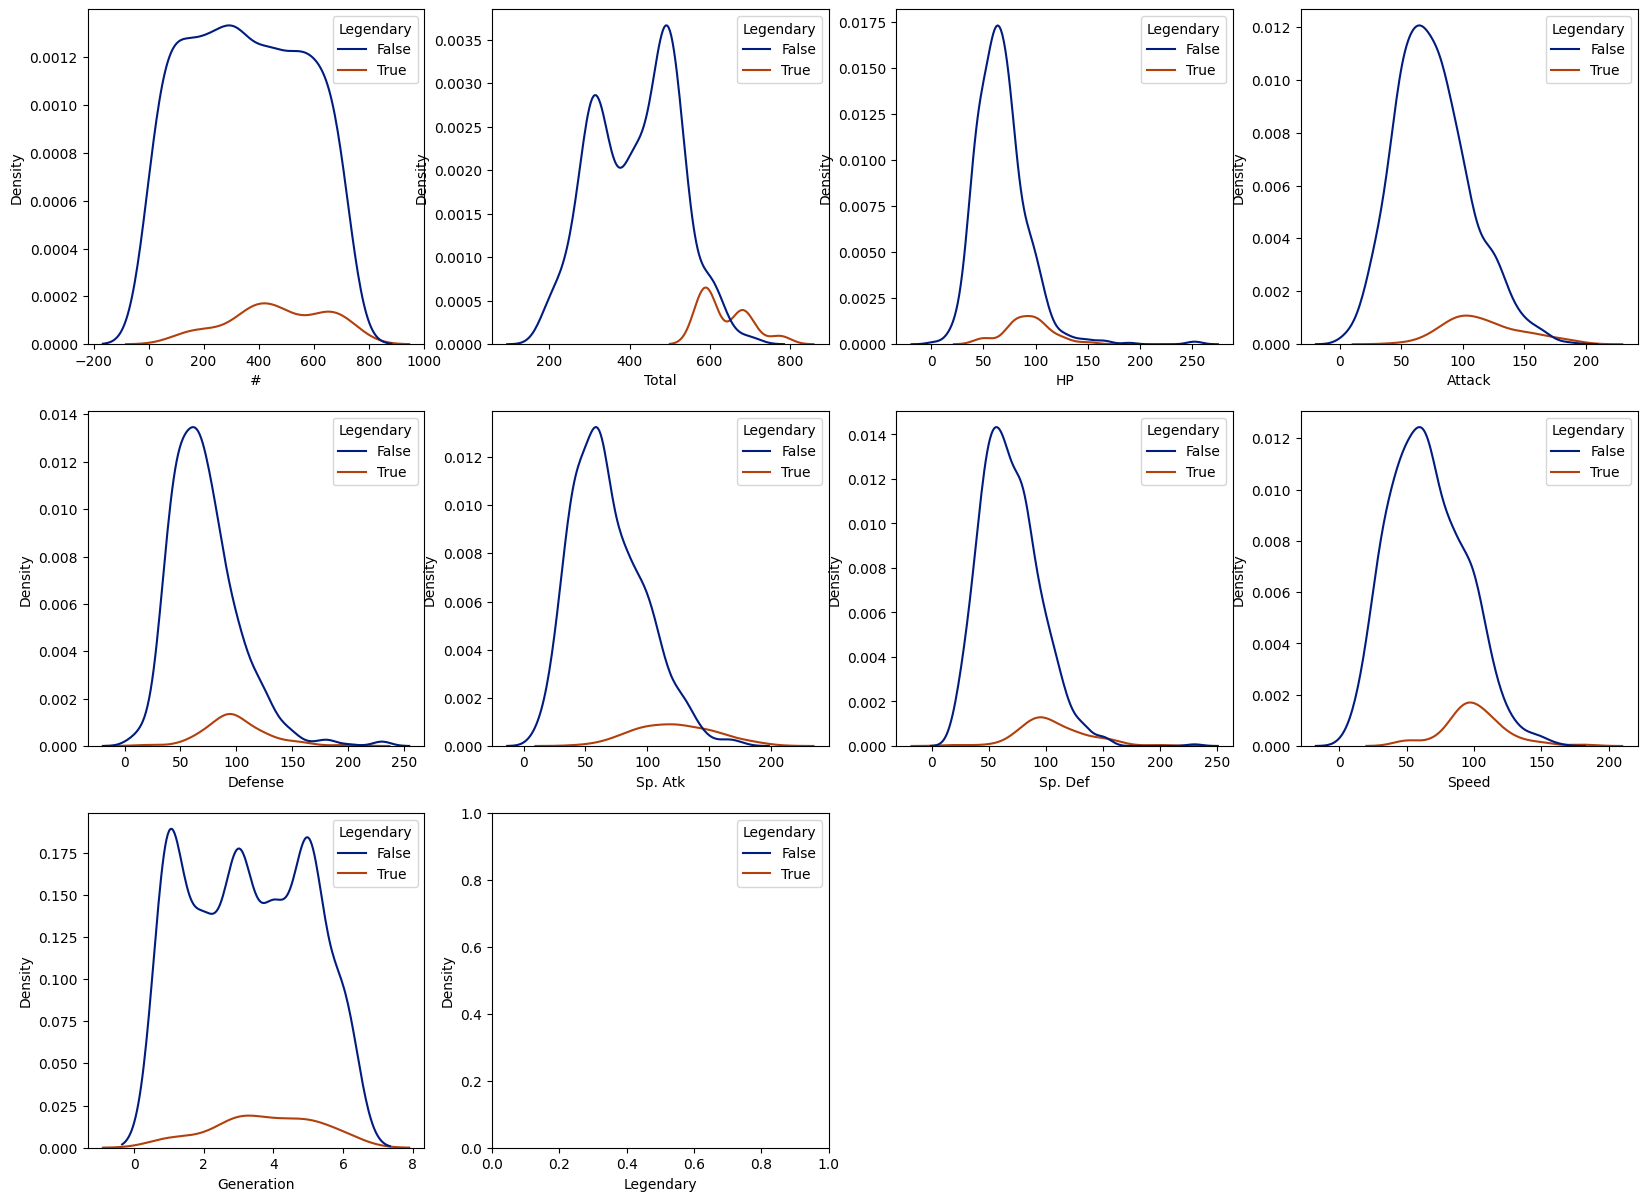

In [17]:
num_col=pokemon.drop(columns=['Name', 'Type 1'])
fig= plt.figure(figsize=(20,20))

for i, var in enumerate(num_col):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(data=num_col,x=var,hue='Legendary',palette='dark')

plt.show()

<Axes: xlabel='count', ylabel='Generation'>

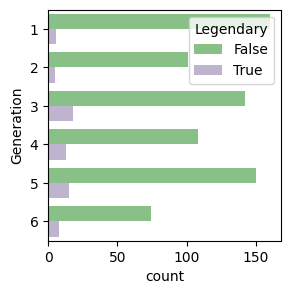

In [18]:
plt.figure(figsize=(3,3))
sns.countplot(data=pokemon,y='Generation',hue='Legendary',palette='Accent')

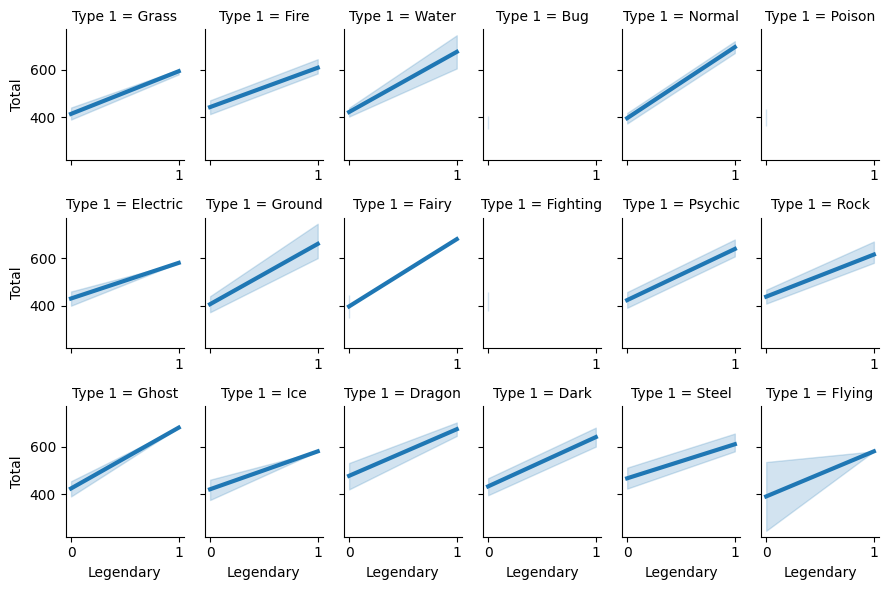

In [19]:
sns.relplot(data=pokemon, kind="line",x="Legendary", y="Total",col="Type 1", col_wrap=6,height=2, aspect=.75, linewidth=3)

No matter what the type the pokemon is, legendary will have higher total points.

# Data Preprocessing

In [20]:
pokemon.sample(5)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
233,215,Sneasel,Dark,430,55,95,55,35,75,115,2,False
590,531,Audino,Normal,445,103,60,86,60,86,50,5,False
96,89,Muk,Poison,500,105,105,75,65,100,50,1,False
639,578,Duosion,Psychic,370,65,40,50,125,60,30,5,False
446,401,Kricketot,Bug,194,37,25,41,25,41,25,4,False


One hot encoding for Type column.
Label Encoding for Legendary column.

In [21]:
pokemon.rename(columns={'Type 1':'Type'},inplace=True)

pokemon_coded = pd.get_dummies(pokemon,columns=['Type'],drop_first=True)

In [22]:
pokemon_coded.sample(5)

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
478,430,Honchkrow,505,100,125,52,105,52,71,4,...,False,False,False,False,False,False,False,False,False,False
170,156,Quilava,405,58,64,58,80,65,80,2,...,False,False,False,False,False,False,False,False,False,False
590,531,Audino,445,103,60,86,60,86,50,5,...,False,False,False,False,True,False,False,False,False,False
227,211,Qwilfish,430,65,95,75,55,55,85,2,...,False,False,False,False,False,False,False,False,False,True
103,95,Onix,385,35,45,160,30,45,70,1,...,False,False,False,False,False,False,False,True,False,False


In [23]:
pokemon_coded.drop(columns=['Name'],inplace=True)

Label Encoding our Legendary column.

In [24]:
encoder = LabelEncoder()
Y= encoder.fit_transform(pokemon_coded['Legendary'])

In [25]:
X = pokemon_coded.drop(columns=['Legendary'])
X

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type_Dark,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,1,318,45,49,49,65,65,45,1,False,...,False,True,False,False,False,False,False,False,False,False
1,2,405,60,62,63,80,80,60,1,False,...,False,True,False,False,False,False,False,False,False,False
2,3,525,80,82,83,100,100,80,1,False,...,False,True,False,False,False,False,False,False,False,False
3,3,625,80,100,123,122,120,80,1,False,...,False,True,False,False,False,False,False,False,False,False
4,4,309,39,52,43,60,50,65,1,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,False,...,False,False,False,False,False,False,False,True,False,False
796,719,700,50,160,110,160,110,110,6,False,...,False,False,False,False,False,False,False,True,False,False
797,720,600,80,110,60,150,130,70,6,False,...,False,False,False,False,False,False,True,False,False,False
798,720,680,80,160,60,170,130,80,6,False,...,False,False,False,False,False,False,True,False,False,False


# Split Train Data and Test Data

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=25)

In [27]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Model Building

**Logistic Regression**

In [28]:
log = LogisticRegression()
log.fit(x_train_scaled,y_train)

log_pred = log.predict(x_test_scaled)
print('Logistic Regression Classifier Accuracy Score: ',accuracy_score(y_test,log_pred)*100)
print("Classification Report:\n", classification_report(y_test,log_pred))

Logistic Regression Classifier Accuracy Score:  96.25
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       147
           1       0.77      0.77      0.77        13

    accuracy                           0.96       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.96      0.96      0.96       160



Based on the classification report from logistic regression, it can be concluded that Legendary precision is 0.98, recall is 0.98, and F1 score is 0.98. For non-Legendary the precision is 0.77, recall is 0.77, and F1 score is 0.77. The accuracy of the Logistic Regression model is 96.25%. This means that the model successfully predicted the class correctly for 96.25% of all data used for evaluation.

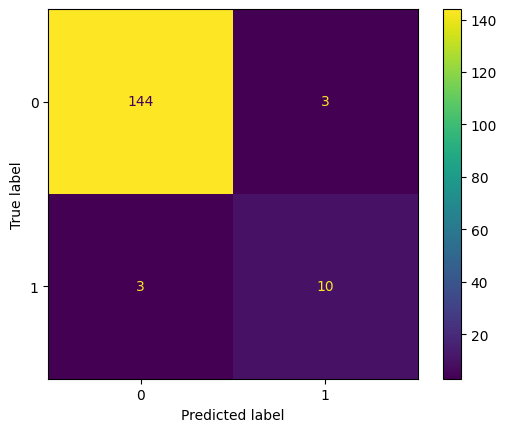

In [29]:
confusion_matrix = metrics.confusion_matrix(y_test,log_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

**Decision Tree**

In [30]:
dtree= tree.DecisionTreeClassifier()
dtree.fit(x_train_scaled,y_train)

dtree_pred = dtree.predict(x_test_scaled)
print('Decision Tree Classifier Accuracy Score: ',accuracy_score(y_test,dtree_pred)*100)
print("Classification Report:\n", classification_report(y_test,dtree_pred))

Decision Tree Classifier Accuracy Score:  93.75
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       147
           1       0.60      0.69      0.64        13

    accuracy                           0.94       160
   macro avg       0.79      0.83      0.80       160
weighted avg       0.94      0.94      0.94       160



Based on the classification report from decicion tree, it can be concluded that Legendary precision is 0.98, recall is 0.95, and F1 score is 0.97. For non-Legendary the precision is 0.59, recall is 0.77, and F1 score is 0.67. The accuracy of the decision tree model is 93.75%.

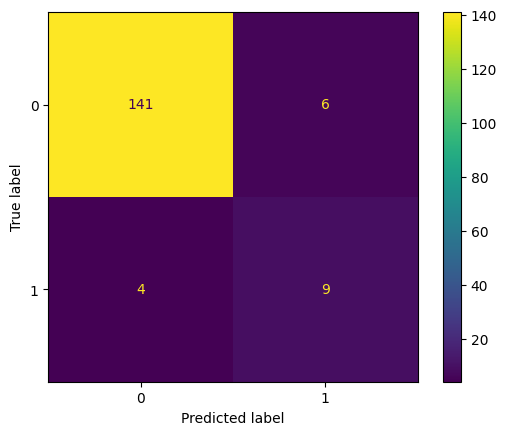

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test,dtree_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

**Random Forest**

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)

rf_pred = rf.predict(x_test_scaled)
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,rf_pred)*100)
print("Classification Report:\n", classification_report(y_test,rf_pred))

Random Forest Classifier Accuracy Score:  93.75
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       147
           1       0.62      0.62      0.62        13

    accuracy                           0.94       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.94      0.94      0.94       160



Based on the classification report from random forest, it can be concluded that Legendary precision is 0.97, recall is 0.97, and F1 score is 0.97. For non-Legendary the precision is 0.69, recall is 0.69, and F1 score is 0.69. The accuracy of the random forest model is 95%.

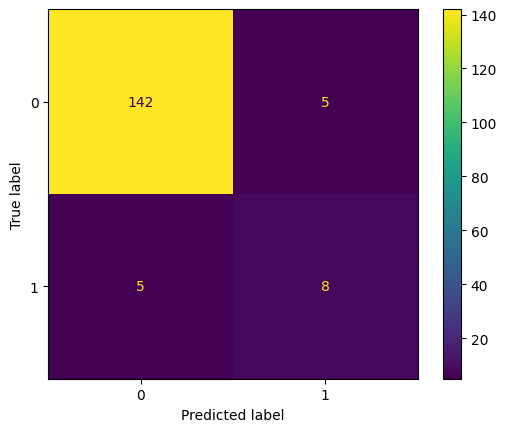

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test,rf_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

**Naive Bayes**

In [34]:
nb = GaussianNB()
nb.fit(x_train_scaled,y_train)

nb_pred = nb.predict(x_test_scaled)
print('Naive Bayes Classifier Accuracy Score: ',accuracy_score(y_test,nb_pred)*100)
print("Classification Report:\n", classification_report(y_test,nb_pred))

Naive Bayes Classifier Accuracy Score:  30.0
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.24      0.39       147
           1       0.10      0.92      0.18        13

    accuracy                           0.30       160
   macro avg       0.54      0.58      0.28       160
weighted avg       0.90      0.30      0.37       160



Based on the classification report from naive bayes, it can be concluded that Legendary precision is 0.97, recall is 0.24, and F1 score is 0.39. For non-Legendary the precision is 0.10, recall is 0.92, and F1 score is 0.18. The accuracy of the random forest model is 30%, indicating that the model may not work well or there are problems that need to be fixed.

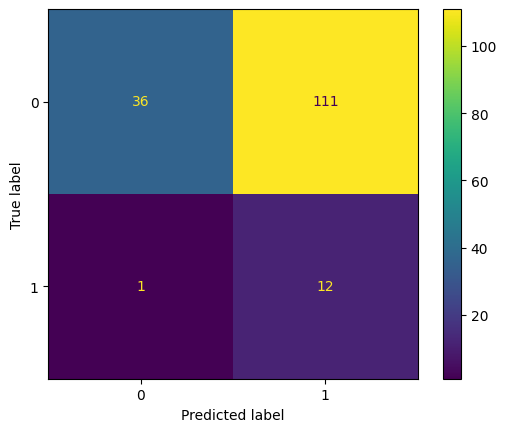

In [35]:
confusion_matrix = metrics.confusion_matrix(y_test,nb_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

**KNN**

In [36]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train_scaled,y_train)
knn_pred = knn.predict(x_test_scaled)
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,knn_pred)*100)
print("Classification Report:\n", classification_report(y_test,knn_pred))

KNN Classifier Accuracy Score:  93.125
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       147
           1       1.00      0.15      0.27        13

    accuracy                           0.93       160
   macro avg       0.97      0.58      0.62       160
weighted avg       0.94      0.93      0.91       160



Based on the classification report from KNN, it can be concluded that Legendary precision is 0.93, recall is 1.00, and F1 score is 0.96. For non-Legendary the precision is 1.00, recall is 0.15, and F1 score is 0.27. The accuracy of the KNN model is 93.125%.

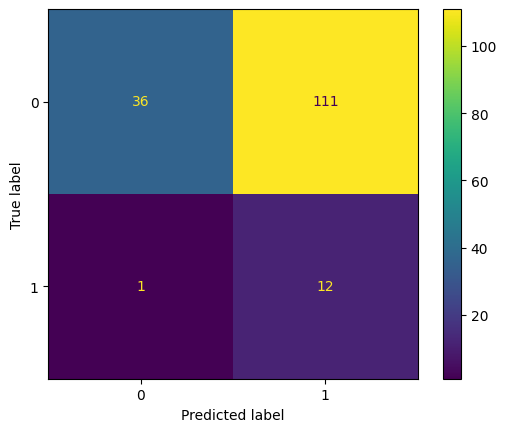

In [37]:
confusion_matrix = metrics.confusion_matrix(y_test,nb_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

**SVM**

In [38]:
svm = SVC()
svm.fit(x_train_scaled,y_train)

svm_pred = svm.predict(x_test_scaled)
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,svm_pred)*100)
print("Classification Report:\n", classification_report(y_test,svm_pred))

SVM Classifier Accuracy Score:  92.5
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       147
           1       0.57      0.31      0.40        13

    accuracy                           0.93       160
   macro avg       0.76      0.64      0.68       160
weighted avg       0.91      0.93      0.91       160



Based on the classification report from SVM, it can be concluded that Legendary precision is 0.94, recall is 0.98, and F1 score is 0.96. For non-Legendary the precision is 0.57, recall is 0.31, and F1 score is 0.40. The accuracy of the KNN model is 92.5%.

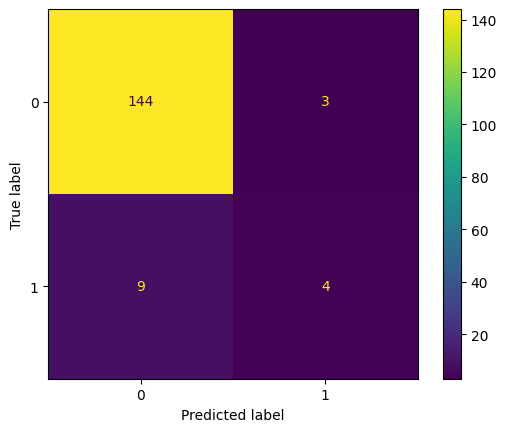

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test,svm_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

# Conclusion

Using the logistic regression model has an accuracy rate of 96.25%, decision tree has an accuracy rate of 93.75%, random forest has an accuracy rate of 93.125%, naive bayes has an accuracy rate of 30%, KNN has an accuracy rate of 93.125%, and SVM has an accuracy rate of 92.5%. In this case, using the random forest and KNN methods will have the same accuracy rate of 93.125%. It can be concluded that using the logistic regression model has the highest accuracy rate of 96.25%.
